In [1]:
from catboost import CatBoostClassifier
import catboost as catboost
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from random import sample
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score, roc_auc_score, roc_curve, cohen_kappa_score, brier_score_loss
from sklearn.metrics import matthews_corrcoef
#import shap

In [52]:
#data = pd.read_csv("dat_15-09-2022_morgan_chiral_1024FP.csv")
data = pd.read_csv("dat_mol_desc.csv")
#data = pd.read_csv("15-09-2022_dat_Substructure.csv")
#data = pd.read_csv("15-09-2022_dat_PubChem.csv")
#data = pd.read_csv("15-09-2022_dat_MACCS.csv")
#data = pd.read_csv("15-09-2022_dat_KlekotaRoth.csv")
#data = pd.read_csv("15-09-2022_dat_CDKgraph.csv")
#data = pd.read_csv("15-09-2022_dat_EState.csv")
#data = pd.read_csv("15-09-2022_dat_AtomPairs2D.csv")

In [53]:
df = pd.DataFrame(data)
df.reset_index(drop=True, inplace=True)
#df

In [54]:
y= df.Target
X=df.drop('Target', axis=1)

In [55]:
cat_features=list(range(0,X.shape[1]))
#print(cat_features)

In [56]:
df.Target.value_counts()

0    1109
1    1102
Name: Target, dtype: int64

In [57]:
y_train = df.Target
x_train = df.drop('Target', axis=1)

Split the dataset

In [58]:
#x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1, stratify = y)

In [59]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T

In [60]:
y_train.value_counts()

0    1109
1    1102
Name: Target, dtype: int64

In [61]:
#Read the validation set
v_test_data = pd.read_csv("val_mol_desc.csv")
#v_test_data = pd.read_csv("15-09-2022_val_Substructure.csv")
#v_test_data = pd.read_csv("15-09-2022_val_PubChem.csv")
#v_test_data = pd.read_csv("15-09-2022_val_MACCS.csv")
#v_test_data = pd.read_csv("15-09-2022_val_KlekotaRoth.csv")
#v_test_data = pd.read_csv("15-09-2022_val_CDKgraph.csv")
#v_test_data = pd.read_csv("15-09-2022_val_EState.csv")
#v_test_data = pd.read_csv("15-09-2022_val_AtomPairs2D.csv")
v_test_data = pd.DataFrame(v_test_data)
v_test_data.shape

(367, 82)

In [62]:
Y_v_test_data = v_test_data.Target
X_v_test_data = v_test_data.drop('Target', axis=1)

In [63]:
#Without hyperparameters
#cb = catboost.CatBoostClassifier()
#############################################################
#from sklearn.ensemble import RandomForestClassifier
#cb = RandomForestClassifier()
#############################################################
#import xgboost as xgb
#cb = xgb.XGBRFClassifier()
#############################################################
#from sklearn.svm import SVC
#cb = SVC(kernel='rbf',probability=True)
#############################################################
#cb = xgb.XGBClassifier()
#############################################################
#cb.fit(x_train.T, y_train.T)
#Model building
#v_predictions = cb.predict(X_v_test_data)
#acc_train=cb.score(x_train.T,y_train.T)*100
#v_acc_test = cb.score(X_v_test_data, Y_v_test_data)*100
#print("Training accuracy without hyperparameters:",acc_train)
#print("Validation accuracy without hyperparameters:",v_acc_test)

In [64]:
#cb = catboost.CatBoostClassifier()
#With hyperparameters
#Parameters for 1024_2048_fp
#cb = catboost.CatBoostClassifier(
#    learning_rate = 0.0001,
#    iterations=2000,
#    random_strength = 42,
#    depth = 12,
#    leaf_estimation_iterations=12
#)
################################################################################################################
#Parameters for desc
cb = catboost.CatBoostClassifier(
    learning_rate = 0.00001,
    iterations=3500,
    random_strength = 42,
    depth = 10,
    leaf_estimation_iterations=5
)
cb.fit(x_train.T, y_train.T, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [65]:
v_predictions = cb.predict(X_v_test_data)
acc_train=cb.score(x_train.T,y_train.T)*100
v_acc_test = cb.score(X_v_test_data, Y_v_test_data)*100
print("Training accuracy with hyperparameters:",acc_train)
print("Validation accuracy with hyperparameters:",v_acc_test)

Training accuracy with hyperparameters: 73.49615558570783
Validation accuracy with hyperparameters: 67.30245231607628


In [66]:
from sklearn.metrics import matthews_corrcoef
print('Accuracy:%0.3f'% v_acc_test)
tn, fp, fn, tp = confusion_matrix(Y_v_test_data, v_predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity:%0.3f'% sensitivity)
print('Specificity:%0.3f'% specificity)
ba = 0.5 * (sensitivity + specificity)
print('Balance accuracy:%0.3f'% ba)
mcc = matthews_corrcoef(Y_v_test_data, v_predictions)
#mcc = matthews_corrcoef(Y_test_data, v_predictions)
print('MCC: %0.3f'% mcc)
r_auc_score = roc_auc_score(Y_v_test_data, v_predictions)
#r_auc_score = roc_auc_score(Y_test_data, v_predictions)
print('AUC: %0.3f' % r_auc_score)
bloss = brier_score_loss(Y_v_test_data, v_predictions)
#bloss = brier_score_loss(Y_test_data, v_predictions)
print('Brier_loss: %0.3f' % bloss)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('False Postive rate: %0.3f' %FPR)
print('False Negative rate: %0.3f' %FNR)
print('Precision: %0.3f' %Precision)
print('Recall: %0.3f' %Recall)
f1=2*((Precision*Recall)/(Precision+Recall))
print('F1: %0.3f' %f1)
#kappa = cohen_kappa_score(Y_test_data, v_predictions)
kappa = cohen_kappa_score(Y_v_test_data, v_predictions)
print('Kappa: %0.3f' %kappa)

Accuracy:67.302
Sensitivity:0.529
Specificity:0.742
Balance accuracy:0.636
MCC: 0.267
AUC: 0.636
Brier_loss: 0.327
False Postive rate: 0.258
False Negative rate: 0.471
Precision: 0.496
Recall: 0.529
F1: 0.512
Kappa: 0.267


In [67]:
cf =(confusion_matrix(Y_v_test_data, v_predictions))
print(classification_report(Y_v_test_data, v_predictions))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       248
           1       0.50      0.53      0.51       119

    accuracy                           0.67       367
   macro avg       0.63      0.64      0.63       367
weighted avg       0.68      0.67      0.68       367



<AxesSubplot:xlabel='Predicted Value', ylabel='True Value'>

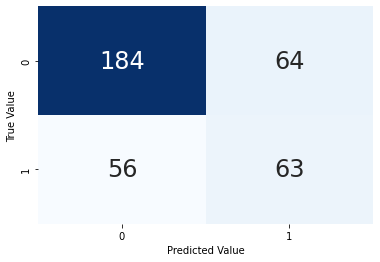

In [68]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "Predicted Value", ylabel ="True Value")
cf_plt

In [69]:
r_probs = [0 for _ in range(len(Y_v_test_data))]
cb_prob = cb.predict_proba(X_v_test_data)
cb_prob = cb_prob[:,1]
#cb_prob

In [70]:
#prediction_val=cb.predict(X_v_test_data)

In [71]:
#prediction_val=pd.DataFrame(prediction_val)

In [72]:
#prediction_val.to_csv("label_val_1024_CB.csv")

In [73]:
r_auc_score = roc_auc_score(Y_v_test_data, cb_prob)
r_auc_score_1 = roc_auc_score(Y_v_test_data,r_probs)
print(r_auc_score)
fpr, tpr, _ = roc_curve(Y_v_test_data, cb_prob)
rfpr, rtpr, _ = roc_curve(Y_v_test_data, r_probs)

0.7048319327731092


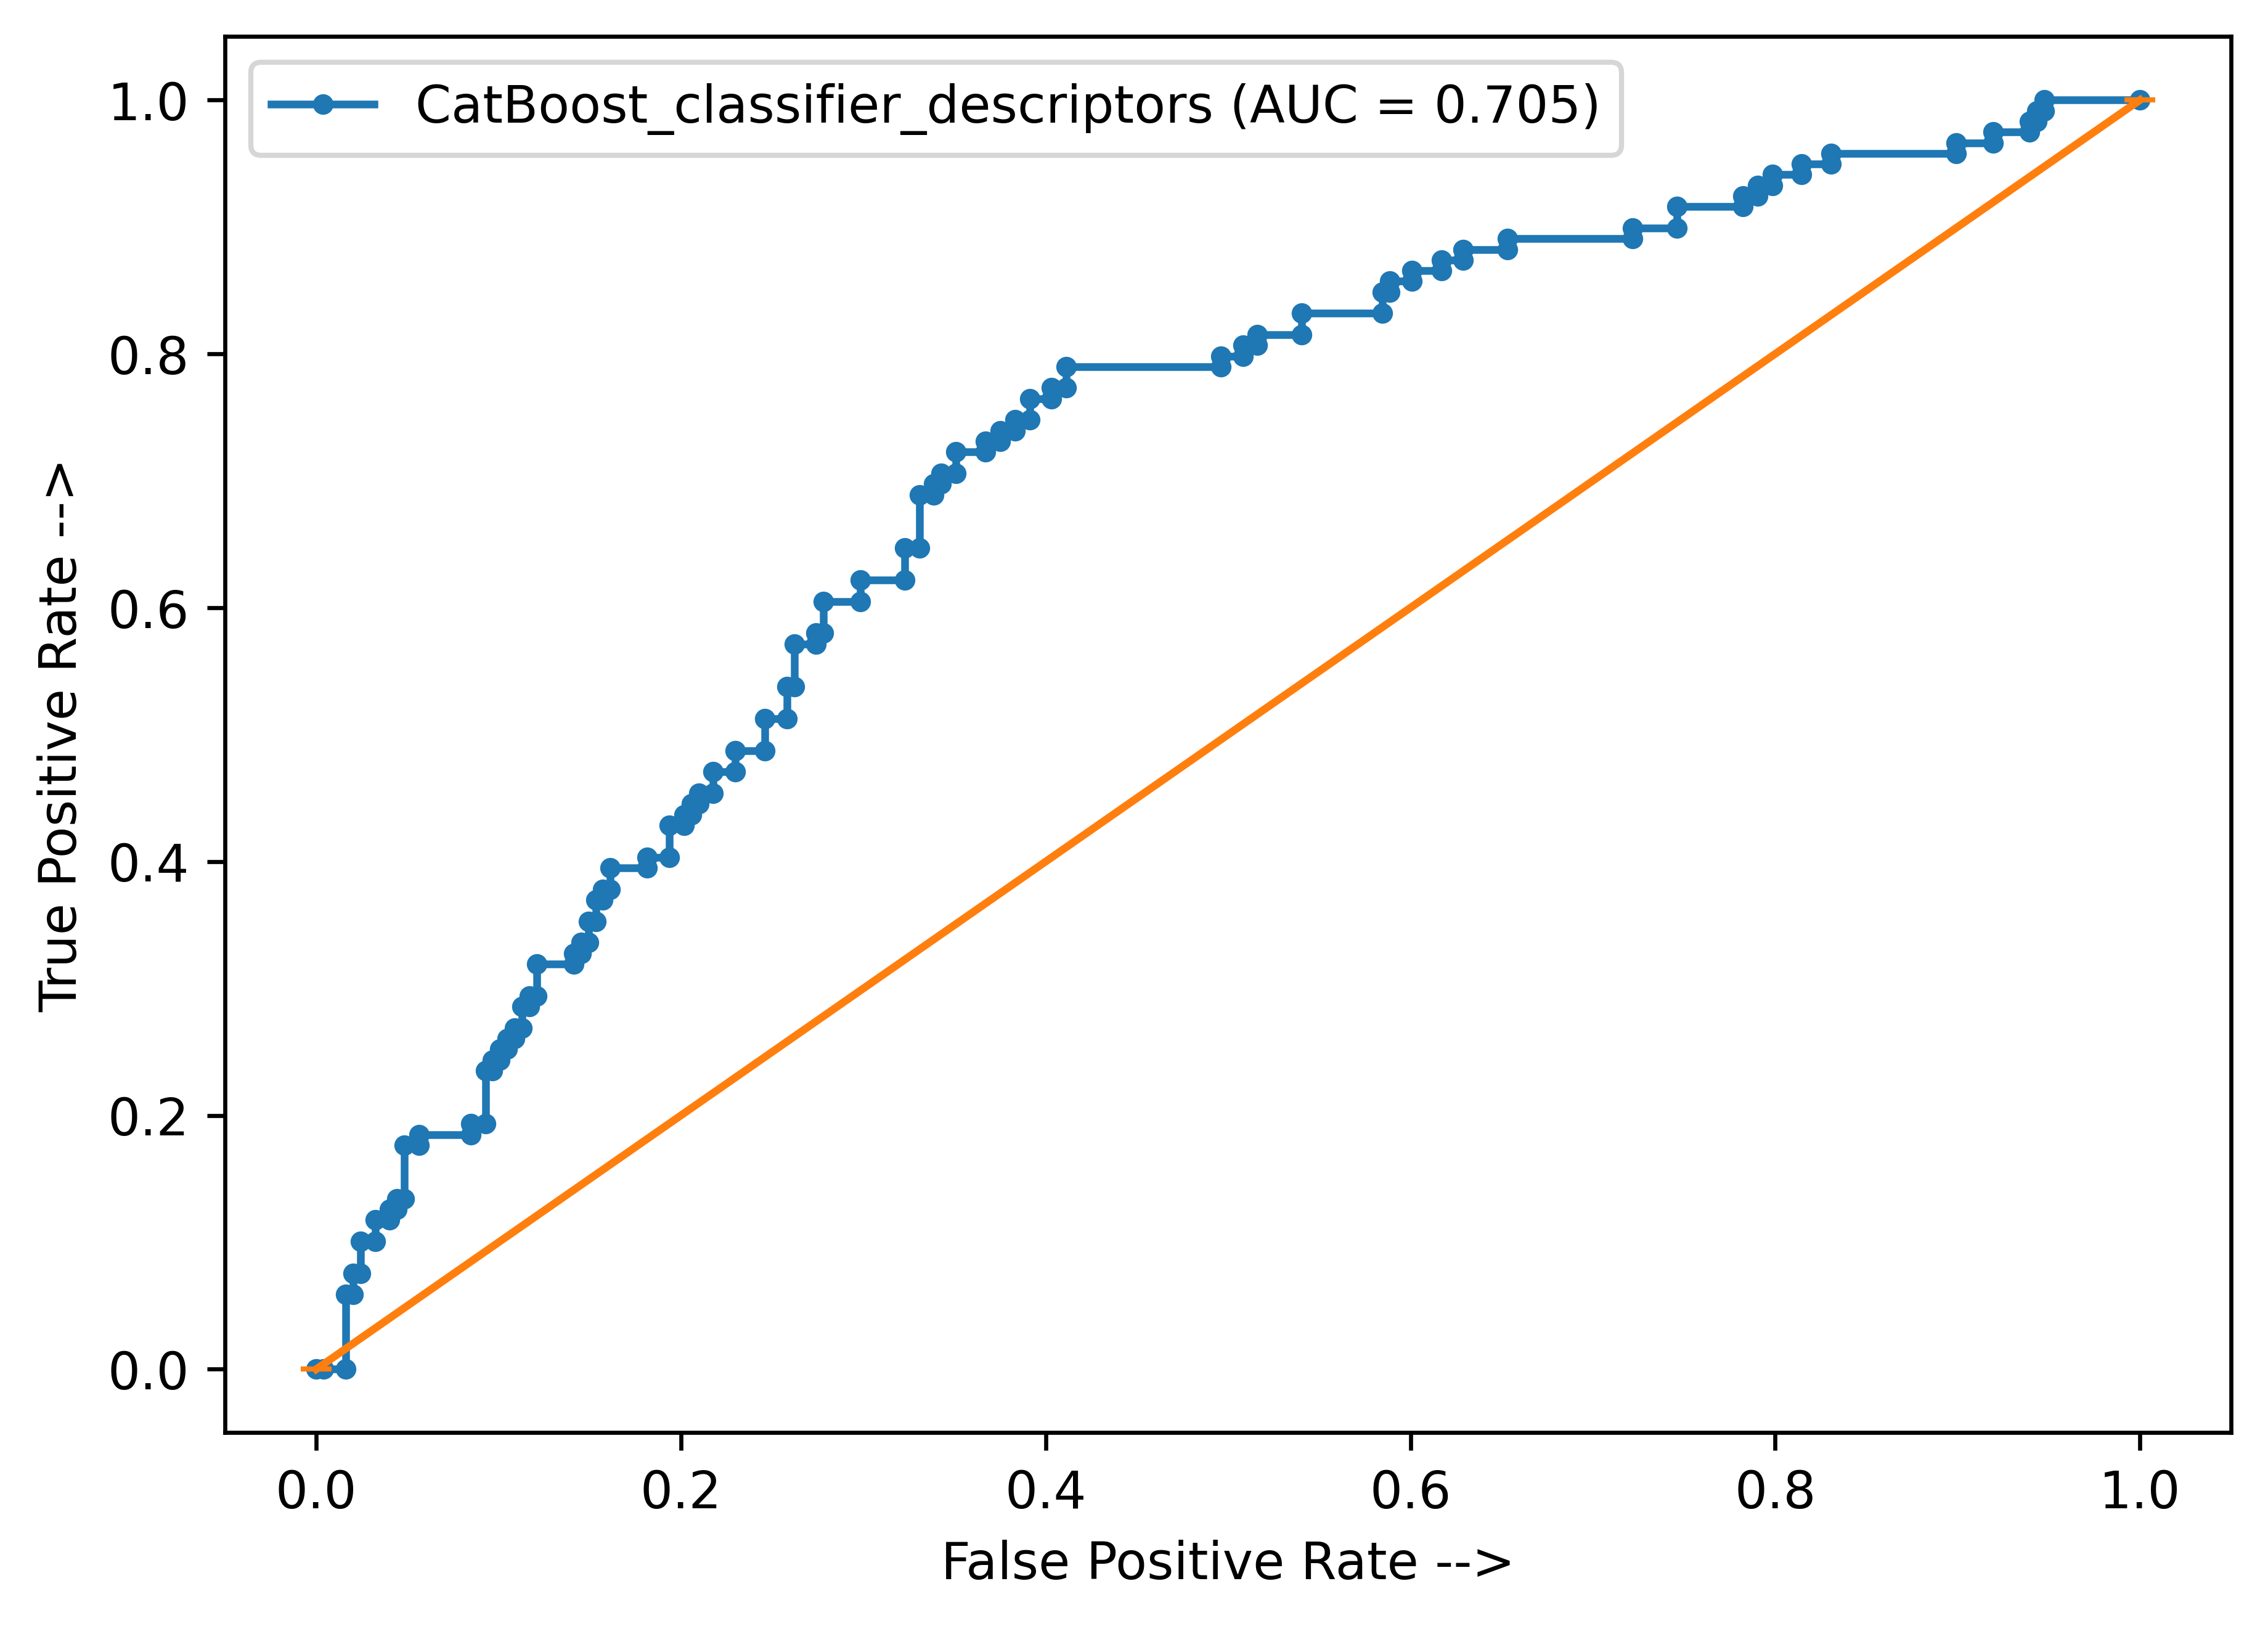

In [74]:
plt.figure(figsize=(7, 5), dpi=600)
plt.plot(fpr, tpr, marker='.', label='CatBoost_classifier_descriptors (AUC = %0.3f)' % r_auc_score)
plt.plot(rfpr, rtpr, marker='_' % r_auc_score_1)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()
#plt.savefig('CB_AUC_1024.png', dpi=600, bbox_inches='tight')

In [35]:
#Read external set
external_data = pd.read_csv("cyclic_ind_rdkit_for_screening.csv")
data_for_screening = pd.DataFrame(external_data)
#data_for_screening

In [36]:
#test external data
test_prob = cb.predict_proba(data_for_screening)
test_prob_F = pd.DataFrame(test_prob)
test_prob_F.to_csv('CB_cyclic_ind_probability_desc.csv')

## Cross validation AUC 

In [79]:
from sklearn.metrics import RocCurveDisplay

In [80]:
from scipy import interp
from sklearn.metrics import roc_curve,auc
cv = StratifiedKFold(n_splits=10,shuffle=False)

0:	learn: 0.6931451	total: 43.2ms	remaining: 2m 31s
1:	learn: 0.6931444	total: 80.8ms	remaining: 2m 21s
2:	learn: 0.6931431	total: 110ms	remaining: 2m 8s
3:	learn: 0.6931420	total: 141ms	remaining: 2m 3s
4:	learn: 0.6931394	total: 173ms	remaining: 2m
5:	learn: 0.6931383	total: 208ms	remaining: 2m 1s
6:	learn: 0.6931370	total: 237ms	remaining: 1m 58s
7:	learn: 0.6931354	total: 266ms	remaining: 1m 56s
8:	learn: 0.6931341	total: 299ms	remaining: 1m 55s
9:	learn: 0.6931331	total: 330ms	remaining: 1m 55s
10:	learn: 0.6931314	total: 381ms	remaining: 2m
11:	learn: 0.6931301	total: 415ms	remaining: 2m
12:	learn: 0.6931292	total: 446ms	remaining: 1m 59s
13:	learn: 0.6931278	total: 475ms	remaining: 1m 58s
14:	learn: 0.6931258	total: 503ms	remaining: 1m 56s
15:	learn: 0.6931250	total: 531ms	remaining: 1m 55s
16:	learn: 0.6931238	total: 563ms	remaining: 1m 55s
17:	learn: 0.6931224	total: 606ms	remaining: 1m 57s
18:	learn: 0.6931215	total: 637ms	remaining: 1m 56s
19:	learn: 0.6931204	total: 670ms	r

/tmp/ipykernel_7173/2921947858.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931454	total: 41.4ms	remaining: 2m 25s
1:	learn: 0.6931435	total: 72.9ms	remaining: 2m 7s
2:	learn: 0.6931424	total: 102ms	remaining: 1m 58s
3:	learn: 0.6931415	total: 131ms	remaining: 1m 54s
4:	learn: 0.6931393	total: 168ms	remaining: 1m 57s
5:	learn: 0.6931381	total: 198ms	remaining: 1m 55s
6:	learn: 0.6931364	total: 229ms	remaining: 1m 54s
7:	learn: 0.6931352	total: 258ms	remaining: 1m 52s
8:	learn: 0.6931341	total: 289ms	remaining: 1m 52s
9:	learn: 0.6931330	total: 344ms	remaining: 2m
10:	learn: 0.6931311	total: 376ms	remaining: 1m 59s
11:	learn: 0.6931298	total: 410ms	remaining: 1m 59s
12:	learn: 0.6931288	total: 441ms	remaining: 1m 58s
13:	learn: 0.6931276	total: 482ms	remaining: 1m 59s
14:	learn: 0.6931256	total: 516ms	remaining: 1m 59s
15:	learn: 0.6931248	total: 547ms	remaining: 1m 59s
16:	learn: 0.6931236	total: 576ms	remaining: 1m 58s
17:	learn: 0.6931223	total: 605ms	remaining: 1m 57s
18:	learn: 0.6931212	total: 635ms	remaining: 1m 56s
19:	learn: 0.6931202	tota

/tmp/ipykernel_7173/2921947858.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931451	total: 36ms	remaining: 2m 5s
1:	learn: 0.6931436	total: 69.3ms	remaining: 2m 1s
2:	learn: 0.6931426	total: 103ms	remaining: 1m 59s
3:	learn: 0.6931416	total: 132ms	remaining: 1m 55s
4:	learn: 0.6931392	total: 164ms	remaining: 1m 54s
5:	learn: 0.6931381	total: 194ms	remaining: 1m 53s
6:	learn: 0.6931365	total: 226ms	remaining: 1m 52s
7:	learn: 0.6931349	total: 259ms	remaining: 1m 52s
8:	learn: 0.6931333	total: 289ms	remaining: 1m 52s
9:	learn: 0.6931322	total: 321ms	remaining: 1m 52s
10:	learn: 0.6931301	total: 353ms	remaining: 1m 52s
11:	learn: 0.6931285	total: 384ms	remaining: 1m 51s
12:	learn: 0.6931276	total: 413ms	remaining: 1m 50s
13:	learn: 0.6931266	total: 441ms	remaining: 1m 49s
14:	learn: 0.6931247	total: 473ms	remaining: 1m 49s
15:	learn: 0.6931237	total: 503ms	remaining: 1m 49s
16:	learn: 0.6931223	total: 533ms	remaining: 1m 49s
17:	learn: 0.6931215	total: 561ms	remaining: 1m 48s
18:	learn: 0.6931200	total: 591ms	remaining: 1m 48s
19:	learn: 0.6931186	tot

/tmp/ipykernel_7173/2921947858.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931451	total: 39.7ms	remaining: 2m 18s
1:	learn: 0.6931438	total: 70ms	remaining: 2m 2s
2:	learn: 0.6931424	total: 105ms	remaining: 2m 2s
3:	learn: 0.6931416	total: 138ms	remaining: 2m
4:	learn: 0.6931392	total: 168ms	remaining: 1m 57s
5:	learn: 0.6931383	total: 198ms	remaining: 1m 55s
6:	learn: 0.6931368	total: 229ms	remaining: 1m 54s
7:	learn: 0.6931354	total: 263ms	remaining: 1m 54s
8:	learn: 0.6931339	total: 292ms	remaining: 1m 53s
9:	learn: 0.6931330	total: 321ms	remaining: 1m 51s
10:	learn: 0.6931308	total: 349ms	remaining: 1m 50s
11:	learn: 0.6931299	total: 380ms	remaining: 1m 50s
12:	learn: 0.6931288	total: 409ms	remaining: 1m 49s
13:	learn: 0.6931277	total: 438ms	remaining: 1m 49s
14:	learn: 0.6931255	total: 468ms	remaining: 1m 48s
15:	learn: 0.6931244	total: 498ms	remaining: 1m 48s
16:	learn: 0.6931233	total: 529ms	remaining: 1m 48s
17:	learn: 0.6931224	total: 557ms	remaining: 1m 47s
18:	learn: 0.6931213	total: 588ms	remaining: 1m 47s
19:	learn: 0.6931200	total: 

/tmp/ipykernel_7173/2921947858.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931454	total: 39.1ms	remaining: 2m 16s
1:	learn: 0.6931445	total: 69.9ms	remaining: 2m 2s
2:	learn: 0.6931424	total: 101ms	remaining: 1m 58s
3:	learn: 0.6931416	total: 135ms	remaining: 1m 58s
4:	learn: 0.6931399	total: 166ms	remaining: 1m 56s
5:	learn: 0.6931384	total: 195ms	remaining: 1m 53s
6:	learn: 0.6931375	total: 227ms	remaining: 1m 53s
7:	learn: 0.6931356	total: 256ms	remaining: 1m 51s
8:	learn: 0.6931344	total: 287ms	remaining: 1m 51s
9:	learn: 0.6931328	total: 317ms	remaining: 1m 50s
10:	learn: 0.6931313	total: 346ms	remaining: 1m 49s
11:	learn: 0.6931300	total: 377ms	remaining: 1m 49s
12:	learn: 0.6931291	total: 412ms	remaining: 1m 50s
13:	learn: 0.6931276	total: 443ms	remaining: 1m 50s
14:	learn: 0.6931259	total: 473ms	remaining: 1m 49s
15:	learn: 0.6931247	total: 508ms	remaining: 1m 50s
16:	learn: 0.6931234	total: 538ms	remaining: 1m 50s
17:	learn: 0.6931225	total: 566ms	remaining: 1m 49s
18:	learn: 0.6931209	total: 595ms	remaining: 1m 49s
19:	learn: 0.6931193	

/tmp/ipykernel_7173/2921947858.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931451	total: 37.1ms	remaining: 2m 9s
1:	learn: 0.6931440	total: 71.8ms	remaining: 2m 5s
2:	learn: 0.6931433	total: 105ms	remaining: 2m 2s
3:	learn: 0.6931417	total: 135ms	remaining: 1m 57s
4:	learn: 0.6931398	total: 165ms	remaining: 1m 55s
5:	learn: 0.6931382	total: 196ms	remaining: 1m 54s
6:	learn: 0.6931370	total: 229ms	remaining: 1m 54s
7:	learn: 0.6931349	total: 260ms	remaining: 1m 53s
8:	learn: 0.6931338	total: 291ms	remaining: 1m 52s
9:	learn: 0.6931321	total: 318ms	remaining: 1m 50s
10:	learn: 0.6931301	total: 349ms	remaining: 1m 50s
11:	learn: 0.6931289	total: 376ms	remaining: 1m 49s
12:	learn: 0.6931282	total: 403ms	remaining: 1m 48s
13:	learn: 0.6931263	total: 431ms	remaining: 1m 47s
14:	learn: 0.6931252	total: 464ms	remaining: 1m 47s
15:	learn: 0.6931238	total: 494ms	remaining: 1m 47s
16:	learn: 0.6931222	total: 527ms	remaining: 1m 47s
17:	learn: 0.6931213	total: 559ms	remaining: 1m 48s
18:	learn: 0.6931194	total: 595ms	remaining: 1m 49s
19:	learn: 0.6931183	to

/tmp/ipykernel_7173/2921947858.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931452	total: 34.8ms	remaining: 2m 1s
1:	learn: 0.6931435	total: 66.9ms	remaining: 1m 57s
2:	learn: 0.6931426	total: 103ms	remaining: 2m
3:	learn: 0.6931414	total: 135ms	remaining: 1m 57s
4:	learn: 0.6931391	total: 164ms	remaining: 1m 54s
5:	learn: 0.6931379	total: 192ms	remaining: 1m 51s
6:	learn: 0.6931366	total: 227ms	remaining: 1m 53s
7:	learn: 0.6931352	total: 255ms	remaining: 1m 51s
8:	learn: 0.6931337	total: 286ms	remaining: 1m 51s
9:	learn: 0.6931326	total: 318ms	remaining: 1m 51s
10:	learn: 0.6931308	total: 346ms	remaining: 1m 49s
11:	learn: 0.6931294	total: 376ms	remaining: 1m 49s
12:	learn: 0.6931287	total: 405ms	remaining: 1m 48s
13:	learn: 0.6931276	total: 438ms	remaining: 1m 49s
14:	learn: 0.6931253	total: 469ms	remaining: 1m 48s
15:	learn: 0.6931245	total: 499ms	remaining: 1m 48s
16:	learn: 0.6931232	total: 527ms	remaining: 1m 48s
17:	learn: 0.6931223	total: 557ms	remaining: 1m 47s
18:	learn: 0.6931210	total: 590ms	remaining: 1m 48s
19:	learn: 0.6931198	tota

/tmp/ipykernel_7173/2921947858.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931453	total: 34.6ms	remaining: 2m
1:	learn: 0.6931437	total: 66.6ms	remaining: 1m 56s
2:	learn: 0.6931422	total: 97.5ms	remaining: 1m 53s
3:	learn: 0.6931415	total: 130ms	remaining: 1m 53s
4:	learn: 0.6931389	total: 159ms	remaining: 1m 50s
5:	learn: 0.6931376	total: 190ms	remaining: 1m 50s
6:	learn: 0.6931361	total: 220ms	remaining: 1m 49s
7:	learn: 0.6931343	total: 249ms	remaining: 1m 48s
8:	learn: 0.6931331	total: 279ms	remaining: 1m 48s
9:	learn: 0.6931319	total: 306ms	remaining: 1m 46s
10:	learn: 0.6931296	total: 339ms	remaining: 1m 47s
11:	learn: 0.6931285	total: 368ms	remaining: 1m 47s
12:	learn: 0.6931273	total: 398ms	remaining: 1m 46s
13:	learn: 0.6931261	total: 428ms	remaining: 1m 46s
14:	learn: 0.6931241	total: 462ms	remaining: 1m 47s
15:	learn: 0.6931232	total: 490ms	remaining: 1m 46s
16:	learn: 0.6931218	total: 520ms	remaining: 1m 46s
17:	learn: 0.6931208	total: 549ms	remaining: 1m 46s
18:	learn: 0.6931198	total: 580ms	remaining: 1m 46s
19:	learn: 0.6931187	to

/tmp/ipykernel_7173/2921947858.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931453	total: 39.1ms	remaining: 2m 16s
1:	learn: 0.6931435	total: 70.7ms	remaining: 2m 3s
2:	learn: 0.6931421	total: 106ms	remaining: 2m 3s
3:	learn: 0.6931409	total: 138ms	remaining: 2m
4:	learn: 0.6931389	total: 169ms	remaining: 1m 58s
5:	learn: 0.6931377	total: 200ms	remaining: 1m 56s
6:	learn: 0.6931363	total: 234ms	remaining: 1m 56s
7:	learn: 0.6931349	total: 265ms	remaining: 1m 55s
8:	learn: 0.6931334	total: 298ms	remaining: 1m 55s
9:	learn: 0.6931322	total: 329ms	remaining: 1m 54s
10:	learn: 0.6931298	total: 360ms	remaining: 1m 54s
11:	learn: 0.6931286	total: 390ms	remaining: 1m 53s
12:	learn: 0.6931276	total: 421ms	remaining: 1m 52s
13:	learn: 0.6931268	total: 452ms	remaining: 1m 52s
14:	learn: 0.6931247	total: 483ms	remaining: 1m 52s
15:	learn: 0.6931234	total: 513ms	remaining: 1m 51s
16:	learn: 0.6931221	total: 543ms	remaining: 1m 51s
17:	learn: 0.6931213	total: 572ms	remaining: 1m 50s
18:	learn: 0.6931205	total: 605ms	remaining: 1m 50s
19:	learn: 0.6931189	total

/tmp/ipykernel_7173/2921947858.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


0:	learn: 0.6931453	total: 38.6ms	remaining: 2m 14s
1:	learn: 0.6931435	total: 69.9ms	remaining: 2m 2s
2:	learn: 0.6931426	total: 99.8ms	remaining: 1m 56s
3:	learn: 0.6931415	total: 130ms	remaining: 1m 53s
4:	learn: 0.6931393	total: 162ms	remaining: 1m 53s
5:	learn: 0.6931382	total: 195ms	remaining: 1m 53s
6:	learn: 0.6931367	total: 227ms	remaining: 1m 53s
7:	learn: 0.6931351	total: 259ms	remaining: 1m 52s
8:	learn: 0.6931338	total: 291ms	remaining: 1m 52s
9:	learn: 0.6931323	total: 322ms	remaining: 1m 52s
10:	learn: 0.6931303	total: 352ms	remaining: 1m 51s
11:	learn: 0.6931293	total: 381ms	remaining: 1m 50s
12:	learn: 0.6931284	total: 411ms	remaining: 1m 50s
13:	learn: 0.6931269	total: 440ms	remaining: 1m 49s
14:	learn: 0.6931247	total: 468ms	remaining: 1m 48s
15:	learn: 0.6931236	total: 498ms	remaining: 1m 48s
16:	learn: 0.6931225	total: 529ms	remaining: 1m 48s
17:	learn: 0.6931214	total: 558ms	remaining: 1m 47s
18:	learn: 0.6931204	total: 587ms	remaining: 1m 47s
19:	learn: 0.6931191

/tmp/ipykernel_7173/2921947858.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


<Figure size 4200x3000 with 0 Axes>

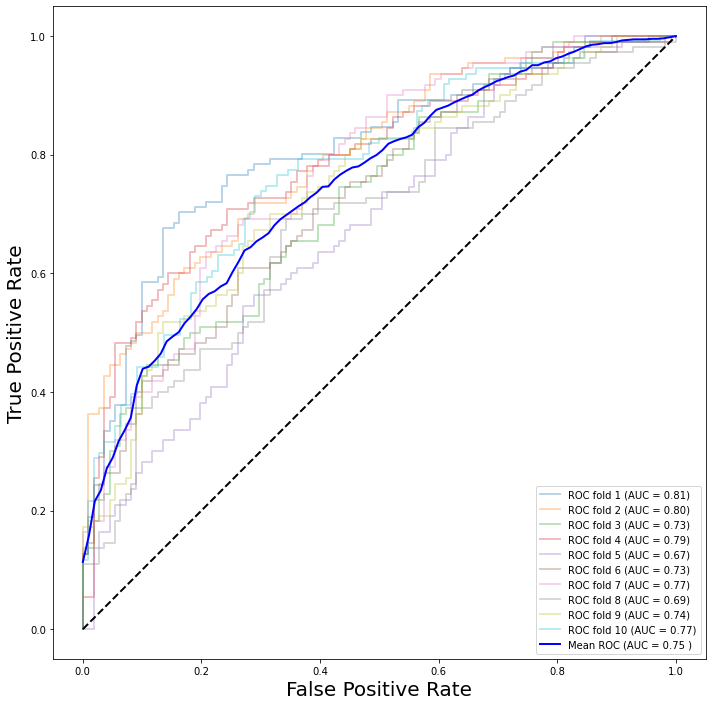

In [81]:
# plot k fold ROC
plt.figure(figsize=(7, 5), dpi=600)
x_train = x_train.T
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_train,y_train):
    prediction = cb.fit(x_train.iloc[train],y_train.iloc[train]).predict_proba(x_train.iloc[test])
    fpr, tpr, t = roc_curve(y_train.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.legend(loc="lower right")
plt.show()
#plt.savefig('CrossVal-AUC_CB_1024.png', dpi=600, bbox_inches='tight')

In [ ]:
##Y-randomization

In [ ]:
accuracy_list = []
mcc_list = []
for i in range(50):
    y_train = y_train.sample(frac=1, replace=False, random_state=i)
    cb.fit(x_train, y_train)
    print('Trained')
    scrmb_predictions = cb.predict(X_v_test_data)
    print(i)
    accuracy = roc_auc_score(Y_v_test_data, scrmb_predictions)
    print('scra_pred')
    accuracy_list.append(accuracy)
    mcc_v = matthews_corrcoef(Y_v_test_data, scrmb_predictions)
    mcc_list.append(mcc_v)
print(accuracy_list)

0:	learn: 0.6931442	total: 51.1ms	remaining: 2m 33s
1:	learn: 0.6931426	total: 198ms	remaining: 4m 56s
2:	learn: 0.6931362	total: 283ms	remaining: 4m 43s
3:	learn: 0.6931316	total: 437ms	remaining: 5m 27s
4:	learn: 0.6931280	total: 523ms	remaining: 5m 13s
5:	learn: 0.6931229	total: 619ms	remaining: 5m 8s
6:	learn: 0.6931209	total: 731ms	remaining: 5m 12s
7:	learn: 0.6931192	total: 819ms	remaining: 5m 6s
8:	learn: 0.6931149	total: 916ms	remaining: 5m 4s
9:	learn: 0.6931094	total: 999ms	remaining: 4m 58s
10:	learn: 0.6931060	total: 1.12s	remaining: 5m 4s
11:	learn: 0.6931031	total: 1.26s	remaining: 5m 14s
12:	learn: 0.6931017	total: 1.39s	remaining: 5m 20s
13:	learn: 0.6930982	total: 1.45s	remaining: 5m 8s
14:	learn: 0.6930929	total: 1.6s	remaining: 5m 18s
15:	learn: 0.6930910	total: 1.78s	remaining: 5m 32s
16:	learn: 0.6930885	total: 1.87s	remaining: 5m 28s
17:	learn: 0.6930884	total: 1.87s	remaining: 5m 10s
18:	learn: 0.6930852	total: 1.98s	remaining: 5m 10s
19:	learn: 0.6930818	total:

In [ ]:
r_auc_score2 = roc_auc_score(Y_v_test_data, scrmb_predictions)
sns.set_style("white")
plt.figure(figsize = (20, 5), dpi=200) 
ax = sns.distplot(accuracy_list, color="green")
plt.axvline(r_auc_score, color="green")
plt.xlabel("AUC Score", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
ax.set(xlim=(0, 1))

In [ ]:
mcc2 = matthews_corrcoef(Y_v_test_data, scrmb_predictions)
sns.set_style("white")
plt.figure(figsize = (20, 5), dpi=200) 
ax = sns.distplot(mcc_list, color="green")
plt.axvline(mcc, color="green")
plt.xlabel("MCC Score", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
ax.set(xlim=(0, 1))

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
#print(mcc_list)
average = Average(accuracy_list)
  
# Printing average of the list
print("Average of the list =", round(average, 3))

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
#print(mcc_list)
average = Average(mcc_list)
  
# Printing average of the list
print("Average of the mcc list =", round(average, 3))

In [ ]:
external_data = pd.read_csv("cyclic_ind_rdkit_for_screening.csv")
data_for_screening = pd.DataFrame(external_data)

In [ ]:
test_prob = cb.predict_proba(data_for_screening)
test_prob_F = pd.DataFrame(test_prob)
test_prob_F.to_csv('CBdesc_probability_FP.csv')